### Find the Flag Decision Tree Classifier

Can you guess which continent this flag comes from?

Use Decision Tree Classifier to classify a flag.

Explore which features are the best to use and the best way to create a decision tree.

#### Import Modules

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format ='retina'

#### Investigate the Data

In [7]:
flags = pd.read_csv('flags.csv', header = 0)
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [8]:
flags.columns

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')

Take a look at the Attribute Information for this dataset from UCI’s Machine Learning Repository.

http://archive.ics.uci.edu/ml/datasets/Flags

#### Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

#### Creating Data and Labels

In [9]:
labels = flags[['Landmass']]
labels.head()

,Landmass
0,5
1,3
2,4
3,6
4,3


In [10]:
data = flags[['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']]
data.head()

,Red,Green,Blue,Gold,White,Black,Orange
0,1,1,0,1,1,1,0
1,1,0,0,1,0,1,0
2,1,1,0,0,1,0,0
3,1,0,1,1,1,0,1
4,1,0,1,1,0,0,0


In [11]:
train_data, test_data, train_labels, test_labels = \
train_test_split(data,labels, random_state=1)

In [12]:
print(len(train_data), len(test_data), len(train_labels), len(test_labels))

145 49 145 49


#### Make and Test the Model

In [13]:
tree = DecisionTreeClassifier(random_state = 1)

In [14]:
tree.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [15]:
print("Tree Test Score: {:.3f}".format(tree.score(test_data, test_labels)))

Tree Test Score: 0.347


#### Tuning the Model

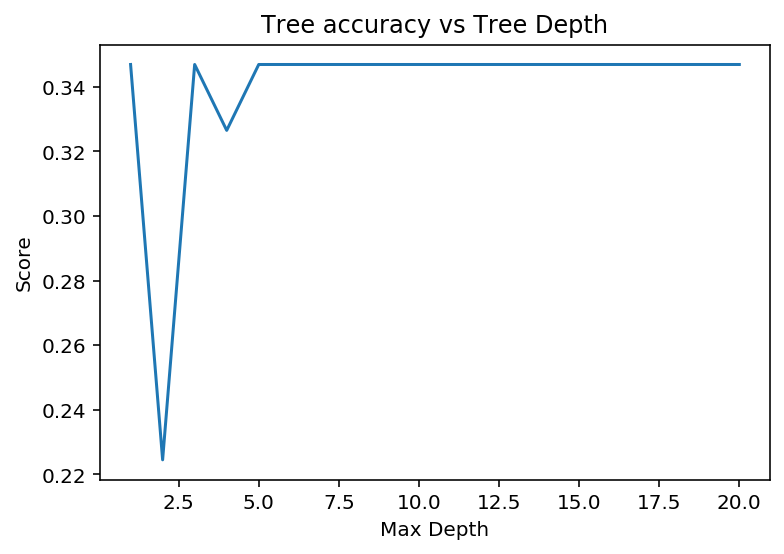

In [16]:
max_depth = list(range(1,21))
scores = []
for i in max_depth:   
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
    
plt.plot(max_depth, scores)
plt.title('Tree accuracy vs Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

It seems like the depth of the tree isn’t really having an impact on its performance. 

This might be a good indication that we’re not using enough features. 

Let’s add all the features that have to do with shapes to our data.

In [17]:
new_data = flags[[
    'Red',
    'Green', 
    'Blue', 
    'Gold',
    'White', 
    'Black', 
    'Orange', 
    'Circles', 
    'Crosses', 
    'Saltires',
    'Quarters', 
    'Sunstars', 
    'Crescent', 
    'Triangle'
]]
new_data.head()

,Red,Green,Blue,Gold,White,Black,Orange,Circles,Crosses,Saltires,Quarters,Sunstars,Crescent,Triangle
0,1,1,0,1,1,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,0,0,1,1,0
3,1,0,1,1,1,0,1,0,0,0,0,0,0,1
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [18]:
train_data, test_data, train_labels, test_labels = \
train_test_split(new_data, labels, random_state=1)

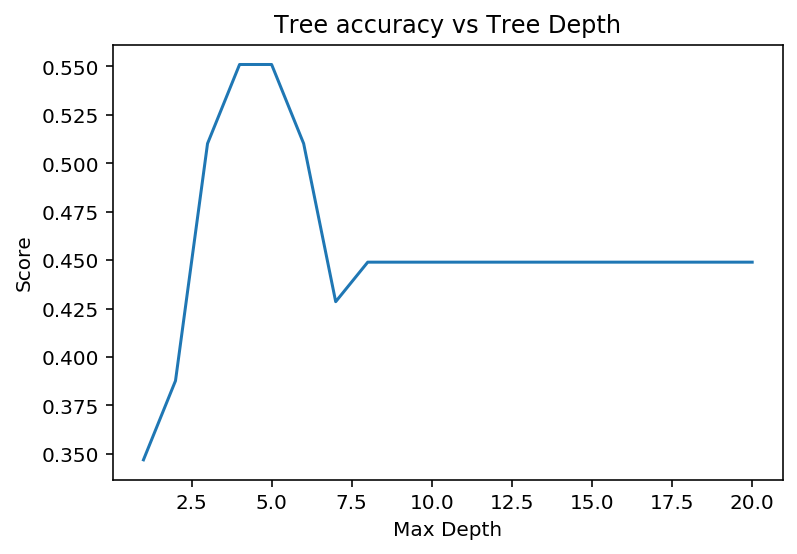

In [19]:
max_depth = list(range(1,21))
scores = []

for i in max_depth: 
    tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
    tree.fit(train_data, train_labels)
    score = tree.score(test_data, test_labels)
    scores.append(score)
    
plt.plot(max_depth, scores)
plt.title('Tree accuracy vs Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

**Conclusion:**

- If the tree is too short, we’re underfitting and not accurately representing the training data.

- If the tree is too big, we’re getting too specific and relying too heavily on the training data.